Install necessary python libraries

In [1]:
import sys
!{sys.executable} -m pip install gitpython pandas requests xarray

Clone github repository to /tmp folder

In [2]:
from git import Repo
repo = Repo.clone_from("git@github.com:metocean/storm_surge.git", "/tmp/storm_surge")

Download LINZ data

In [1]:
sys.path.append("/tmp/storm_surge/storm_surge/data_processing/linz_waterlevel")
# sys.path.append("/source/storm_surge/storm_surge/data_processing/linz_waterlevel")
from linz_download import LINZ_Site
from datetime import datetime

output_file = '/tmp/AUCT_raw.nc'
site = LINZ_Site('AUCT', tstart=datetime(2021, 12, 20), tend=datetime(2022,1,9))
site.get_data()
site.to_netcdf(output_file)

Year:  2021
Year:  2022
Year:  2021
Year:  2022


Plot LINZ data

<xarray.Dataset>
Dimensions:    (time: 30240, sensor: 2, site: 1)
Coordinates:
  * time       (time) datetime64[ns] 2021-12-20 ... 2022-01-09T23:59:00
  * sensor     (sensor) int32 40 41
Dimensions without coordinates: site
Data variables:
    elev       (sensor, time) float32 ...
    longitude  (site) float64 ...
    latitude   (site) float64 ...
Attributes:
    site_name:      AUCT
    location_name:  Auckland

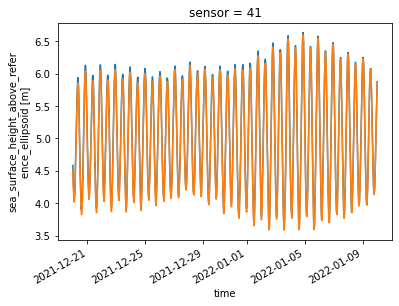

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

ds = xr.open_dataset(output_file)
ds.elev.isel(sensor=0).plot();
ds.elev.isel(sensor=1).plot();
ds
